# A curva normal
Uma distribuição normal de probabilidade é completamente definida pelos dois parâmetros de sua função densidade de probabilidade: a média $\mu$ e o desvio padrão $\sigma$:

\begin{align}
        \text{fdp}(x)=N(x)=\frac{1}{\sigma\sqrt{2\pi}}\text{exp}\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

No Python, usaremos o método *pdf* *(probability density function)* da classe *stats.norm* (biblioteca *scipy*).

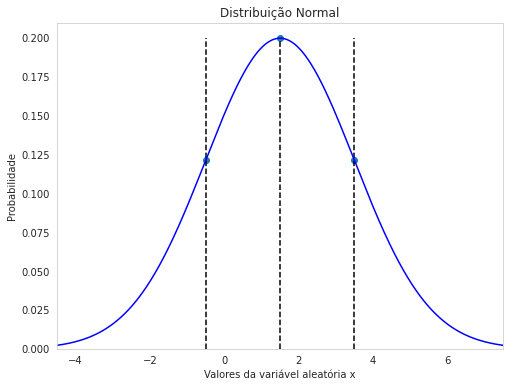

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Criação de uma distribuição normal com média 1.5 e desvio padrão 2.0
media, desvpad = 1.5, 2.0
distnorm = stats.norm(media, desvpad)
### Representação gráfica
# Geração de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 500, media-3*desvpad, media+3*desvpad
x = np.linspace(INICIO, FIM, QUANT)
# Cálculo da fdp normal para os valores de do vetor x
y = distnorm.pdf(x)
# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b')
plt.xlim(INICIO, FIM)
plt.ylim(0, distnorm.pdf(media)+0.01)
plt.title('Distribuição Normal')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('Probabilidade')
plt.scatter([media - desvpad, media, media + desvpad],
            [distnorm.pdf(media-desvpad), distnorm.pdf(media), distnorm.pdf(media+desvpad)])
plt.vlines([media- desvpad, media, media + desvpad], 0, distnorm.pdf(media),
           colors='k', linestyles='dashed')
plt.grid()
plt.show()

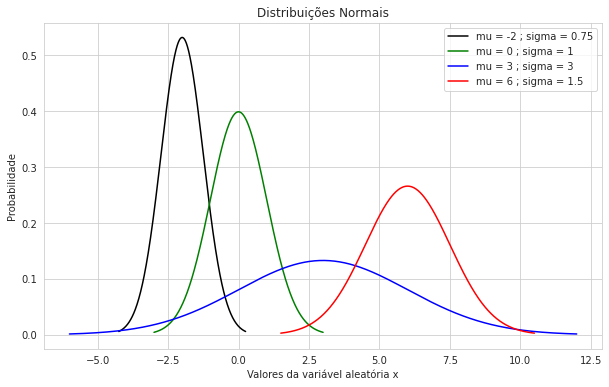

In [ ]:
## Plotando várias distribuições normais
# Médias e desvios padrão
medias = [-2, 0, 3, 6]
desvios = [0.75, 1, 3, 1.5]
# Cores das curvas
cores = ['k', 'g', 'b', 'r']
# Tamanho da figura
plt.figure(figsize=(10, 6))
# Plotagem dos gráficos
for mu, std, cor in zip(medias, desvios, cores):
  normal = stats.norm(mu, std)
  QUANT, INICIO, FIM = 500, mu-3*std, mu+3*std
  x = np.linspace(INICIO, FIM, QUANT)
  y = normal.pdf(x)
  plt.plot(x, y, cor)
# Atributos do gráfico
plt.title('Distribuições Normais')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('Probabilidade')
plt.legend(['mu = -2 ; sigma = 0.75',
            'mu = 0 ; sigma = 1',
            'mu = 3 ; sigma = 3',
            'mu = 6 ; sigma = 1.5'])
plt.grid(True)
plt.show()


# Probabilidades na curva normal padrão

*   Encontre a área acumulada que corresponde a um escore-z de –2,19.
*   Encontre a área acumulada que corresponde a um escore-z de 2,17.
*   Encontre a área sob a curva normal padrão à direita de z = 1,06.
*   Encontre a área sob a curva normal padrão entre z = –1,5 e z = 1,25.




Usaremos os métodos *cdf* *(Cumulative distribution function)* para áreas à esquerda de um escore-z e *sf* *(Survival function, definida como sf = 1 - cdf)* para áreas à direita.

In [ ]:
# Definição da distribuição normal padrão
media, std = 0, 1
normpad = stats.norm(media, std)
# Área acumulada que corresponde a um escore-z de –2,19
area1 = normpad.cdf(-2.19)
print(f'A área acumulada correspondente a z = -2.19 é {area1:.4f}.')
# Área acumulada que corresponde a um escore-z de 2,17
area2 = normpad.cdf(2.17)
print(f'A área acumulada correspondente a z = 2.17 é {area2:.4f}.')
# Área sob a curva normal padrão à direita de z = 1,06
area3 = normpad.sf(1.06) # Isso equivale a area3 = 1 - normpad.cdf(1.06)
print(f'A área sob a curva normal à direita de z = 1.06 é {area3:.4f}.')
# Área sob a curva normal padrão entre z = –1,5 e z = 1,25
area4 = normpad.cdf(1.25) - normpad.cdf(-1.5)
print(f'A área sob a curva normal entre z = -1.5 e z = 1.25 é {area4:.4f}.')

A área acumulada correspondente a z = -2.19 é 0.0143.
A área acumulada correspondente a z = 2.17 é 0.9850.
A área sob a curva normal à direita de z = 1.06 é 0.1446.
A área sob a curva normal entre z = -1.5 e z = 1.25 é 0.8275.


**Exercício:** A velocidade média dos veículos que passam em um trecho de uma rodovia é 67 milhas por hora, com desvio padrão de 3,5 milhas por hora.

Um veículo é selecionado de forma aleatória. Qual é a probabilidade de que ele esteja ultrapassando o limite de velocidade de 70 milhas por hora? Suponha que as velocidades são normalmente distribuídas.

In [ ]:
media, std = 67, 3.5
LIMITE = 70
velocidades = stats.norm(loc=media, scale=std)
prob = velocidades.sf(LIMITE)
print(f'A probabilidade de ultrapassar o limite de {LIMITE} mi/h é de {100*prob:.2f}%.')

A probabilidade de ultrapassar o limite de 70 mi/h é de 19.57%.


**Exercício:** Uma pesquisa indica que, para cada ida ao supermercado, um consumidor permanece na loja em média 45 minutos, com desvio padrão de 12 minutos. A duração dos tempos gastos na loja é normalmente distribuída. Um consumidor entra na loja.

(a) Calcule a probabilidade de que ele ficará na loja:
*   Entre 24 e 54 minutos
*   Mais que 39 minutos

(b) Suponha que 200 consumidores entraram na loja. Quantos deles você esperaria que estivessem na loja para cada intervalo de tempo do item (a)?



In [ ]:
media, std = 45, 12
compras = stats.norm(loc=media, scale=std)
# Item (a)
print('A probabilidade de que um consumidor esteja na loja:')
prob1 = compras.cdf(54) - compras.cdf(24)
print(f'- entre 24 e 54 min é de {prob1*100:.2f}%')
prob2 = compras.sf(39)
print(f'- por mais de 39 min é de {prob2*100:.2f}%')
# Item (b)
print('Se 200 consumidores entrarem na loja, espera-se que:')
print(f'  {round(200*prob1)} permaneçam na loja entre 24 e 54 min')
print(f'  {round(200*prob2)} permaneçam por mais de 39 min')

A probabilidade de que um consumidor esteja na loja:
- entre 24 e 54 min é de 73.33%
- por mais de 39 min é de 69.15%
Se 200 consumidores entrarem na loja, espera-se que:
  147 permaneçam na loja entre 24 e 54 min
  138 permaneçam por mais de 39 min
